# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap
from collections import Counter
import requests
import json

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print("df_hh_income shape:", df_hh_income.shape)
print("df_pct_poverty shape:", df_pct_poverty.shape)
print("df_pct_completed_hs shape:", df_pct_completed_hs.shape)
print("df_share_race_city shape:", df_share_race_city.shape)
print("df_fatalities shape:", df_fatalities.shape)


df_hh_income shape: (29322, 3)
df_pct_poverty shape: (29329, 3)
df_pct_completed_hs shape: (29329, 3)
df_share_race_city shape: (29268, 7)
df_fatalities shape: (2535, 14)


In [7]:
print("df_hh_income columns:", df_hh_income.columns.to_list())
print("df_pct_poverty columns:", df_pct_poverty.columns.to_list())
print("df_pct_completed_hs columns:", df_pct_completed_hs.columns.to_list())
print("df_share_race_city columns:", df_share_race_city.columns.to_list())
print("df_fatalities columns:", df_fatalities.columns.to_list())


df_hh_income columns: ['Geographic Area', 'City', 'Median Income']
df_pct_poverty columns: ['Geographic Area', 'City', 'poverty_rate']
df_pct_completed_hs columns: ['Geographic Area', 'City', 'percent_completed_hs']
df_share_race_city columns: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_fatalities columns: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [8]:
# Check for NaN values in each DataFrame
print("df_hh_income NaN values:", df_hh_income.isna().sum().sum())
print("df_pct_poverty NaN values:", df_pct_poverty.isna().sum().sum())
print("df_pct_completed_hs NaN values:", df_pct_completed_hs.isna().sum().sum())
print("df_share_race_city NaN values:", df_share_race_city.isna().sum().sum())
print("df_fatalities NaN values:", df_fatalities.isna().sum().sum())


df_hh_income NaN values: 51
df_pct_poverty NaN values: 0
df_pct_completed_hs NaN values: 0
df_share_race_city NaN values: 0
df_fatalities NaN values: 346


In [9]:
# Check for duplicate rows in each DataFrame
print("df_hh_income duplicate rows:", df_hh_income.duplicated().sum())
print("df_pct_poverty duplicate rows:", df_pct_poverty.duplicated().sum())
print("df_pct_completed_hs duplicate rows:", df_pct_completed_hs.duplicated().sum())
print("df_share_race_city duplicate rows:", df_share_race_city.duplicated().sum())
print("df_fatalities duplicate rows:", df_fatalities.duplicated().sum())

df_hh_income duplicate rows: 0
df_pct_poverty duplicate rows: 0
df_pct_completed_hs duplicate rows: 0
df_share_race_city duplicate rows: 0
df_fatalities duplicate rows: 0


In [10]:
# Melihat jumlah NaN pada setiap kolom
print("df_hh_income NaN values per column:\n", df_hh_income.isna().sum())
print("df_fatalities NaN values per column:\n", df_fatalities.isna().sum())


df_hh_income NaN values per column:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
df_fatalities NaN values per column:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [11]:
# Mengganti nilai NaN dengan 0
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

# Memastikan tidak ada lagi nilai NaN
print("df_hh_income NaN values after filling with 0:", df_hh_income.isna().sum().sum())
print("df_fatalities NaN values after filling with 0:", df_fatalities.isna().sum().sum())


df_hh_income NaN values after filling with 0: 0
df_fatalities NaN values after filling with 0: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [13]:
# Convert 'poverty_rate' to numeric, handling errors
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

# Sort the data by poverty rate in descending order
state_poverty_rates = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

In [14]:
state_poverty_rates

Geographic Area
MS   26.88
AZ   25.67
GA   23.78
NM   23.08
AR   22.96
LA   22.34
SC   22.16
WV   21.13
OK   20.66
AL   20.65
MO   20.11
KY   20.08
TX   19.92
TN   19.89
AK   19.85
NC   19.75
ID   18.24
DC   18.00
MI   17.90
FL   17.57
CA   17.12
ME   16.89
OR   16.52
MT   16.51
SD   16.03
IN   15.50
WA   15.02
OH   14.85
KS   14.76
VA   14.59
IL   13.88
VT   13.79
MN   13.75
HI   13.40
CO   13.36
NE   12.98
WI   12.86
NH   12.66
DE   12.56
PA   12.52
NV   12.47
IA   12.29
ND   12.16
UT   11.98
NY   11.67
RI   10.37
MD   10.31
WY    9.89
MA    9.59
CT    9.14
NJ    8.19
Name: poverty_rate, dtype: float64

In [15]:
# Membuat bar chart
fig = px.bar(state_poverty_rates,
             x=state_poverty_rates.index,
             y=state_poverty_rates,
             title='Poverty Rates in US States',
             labels={'y': 'Poverty Rate (%)', 'x': 'US State'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=80, r=40, t=80, b=30),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')

fig.show()

# Menampilkan negara bagian dengan tingkat kemiskinan tertinggi dan terendah
print("State with the highest poverty rate:", state_poverty_rates.index[0], "with a poverty rate of", state_poverty_rates.iloc[0])
print("State with the lowest poverty rate:", state_poverty_rates.index[-1], "with a poverty rate of", state_poverty_rates.iloc[-1])


State with the highest poverty rate: MS with a poverty rate of 26.88425414364641
State with the lowest poverty rate: NJ with a poverty rate of 8.19097605893186


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [16]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [17]:
# Convert 'percent_completed_hs' to numeric, handling errors
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

df_hs_graduation_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True)

In [18]:
df_hs_graduation_state

Geographic Area
TX   75.69
MS   78.47
GA   79.01
LA   79.29
AR   79.95
AL   80.30
AZ   80.47
SC   80.85
NM   80.98
TN   81.63
CA   81.96
WV   82.35
KY   82.37
OK   82.91
NC   83.25
MO   83.52
AK   84.63
VA   84.88
ID   85.17
FL   85.74
IN   86.32
NV   87.72
SD   87.75
ND   87.82
WA   88.20
KS   88.23
OR   88.30
OH   88.34
MD   88.42
IL   88.48
DE   88.52
RI   88.82
PA   89.02
MI   89.21
DC   89.30
MN   89.47
VT   89.98
NE   89.99
CO   90.11
IA   90.11
WI   90.26
MT   90.49
NY   90.61
NH   90.71
NJ   90.85
ME   91.43
CT   91.59
UT   91.62
HI   91.67
WY   92.10
MA   92.40
Name: percent_completed_hs, dtype: float64

In [19]:
# Membuat bar chart
fig = px.bar(df_hs_graduation_state,
             x=df_hs_graduation_state.index,
             y=df_hs_graduation_state,
             title='High School Graduation Rate in US States',
             labels={'y': 'High School Graduation Rate (%)', 'x': 'US State'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=80, r=40, t=80, b=30),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')
fig.update_yaxes(range=[75, 95], showgrid=True, gridwidth=0.5, gridcolor='gray')

fig.show()

# Menampilkan negara bagian dengan tingkat kelulusan SMA terendah dan tertinggi
print("State with the lowest high school graduation rate:", df_hs_graduation_state.index[0], "with a high school graduation rate of", df_hs_graduation_state.iloc[0])
print("State with the highest high school graduation rate:", df_hs_graduation_state.index[-1], "with a high school graduation rate of", df_hs_graduation_state.iloc[-1])


State with the lowest high school graduation rate: TX with a high school graduation rate of 75.69
State with the highest high school graduation rate: MA with a high school graduation rate of 92.40408163265306


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [20]:
# Mengelompokkan data berdasarkan 'Geographic Area' dan menghitung rata-rata
spr = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
sgr = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

# Menggabungkan data berdasarkan 'Geographic Area'
combined_df = pd.DataFrame({
    'poverty_rate': spr,
    'hs_graduation_rate': sgr
}).dropna()

# Membuat grafik garis dengan dua sumbu y
fig = go.Figure()

# Menambahkan garis tingkat kemiskinan
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['poverty_rate'],
                         mode='lines', name='Poverty Rate',
                         line=dict(color='firebrick', width=2)))

# Menambahkan garis tingkat kelulusan SMA
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['hs_graduation_rate'],
                         mode='lines', name='High School Graduation Rate',
                         line=dict(color='royalblue', width=2), yaxis='y2'))

# Menyesuaikan tata letak
fig.update_layout(
    title='Poverty Rates and High School Graduation Rates in US States',
    xaxis=dict(title='US State'),
    yaxis=dict(title='Poverty Rate (%)', titlefont=dict(color='firebrick'), tickfont=dict(color='firebrick')),
    yaxis2=dict(title='High School Graduation Rate (%)', titlefont=dict(color='royalblue'), tickfont=dict(color='royalblue'),
                overlaying='y', side='right'),
    legend=dict(x=0.1, y=0.9),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [21]:
# Menggabungkan data berdasarkan 'Geographic Area'
combined_df = pd.DataFrame({
    'poverty_rate': spr,
    'hs_graduation_rate': sgr
}).dropna()

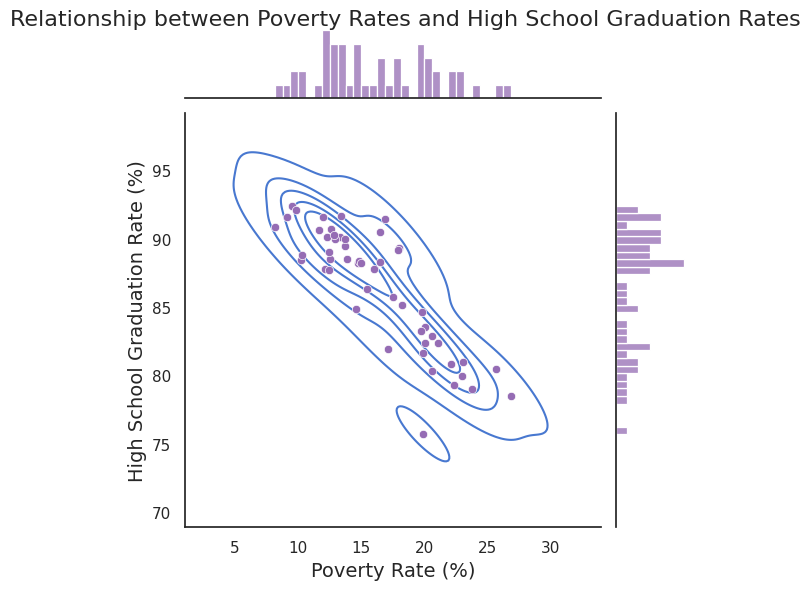

In [22]:
# Membuat plot dengan seaborn .jointplot()
sns.set(style="white", palette="muted")

# Menggunakan jointplot dengan KDE dan scatter plot
g = sns.jointplot(data=combined_df, x='poverty_rate', y='hs_graduation_rate', kind='scatter', color='m', marginal_kws=dict(bins=30, fill=True))

# Menambahkan KDE
g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

# Menambahkan judul dan label
g.fig.suptitle('Relationship between Poverty Rates and High School Graduation Rates', fontsize=16)
g.set_axis_labels('Poverty Rate (%)', 'High School Graduation Rate (%)', fontsize=14)

# Menyesuaikan tata letak untuk menghindari overlay judul
plt.subplots_adjust(top=0.95)

# Menampilkan plot
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

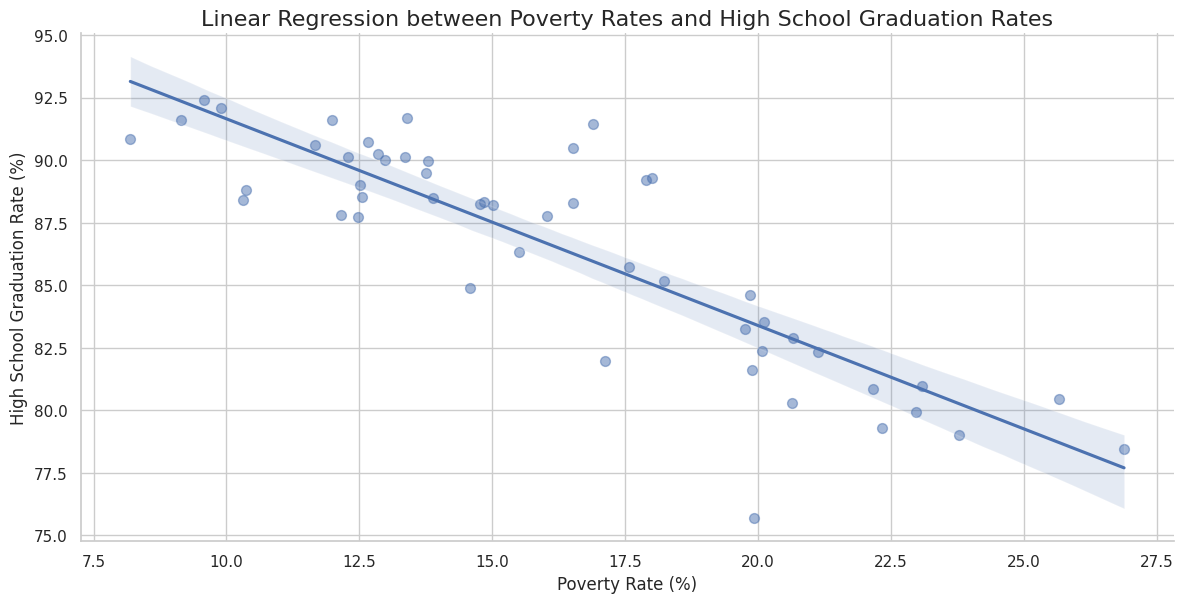

In [23]:
# Membuat plot dengan seaborn .lmplot()
sns.set(style="whitegrid")

# Menggunakan lmplot untuk menunjukkan regresi linier
lm = sns.lmplot(x='poverty_rate', y='hs_graduation_rate', data=combined_df, aspect=2, height=6, scatter_kws={'s': 50, 'alpha': 0.5})

# Menambahkan judul dan label
lm.set_axis_labels('Poverty Rate (%)', 'High School Graduation Rate (%)')
plt.title('Linear Regression between Poverty Rates and High School Graduation Rates', fontsize=16)

# Menampilkan plot
plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [24]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [25]:
# Mengonversi kolom ras ke numerik, menangani kesalahan
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

# Mengelompokkan data berdasarkan 'Geographic area' dan menghitung rata-rata
state_race_share = df_share_race_city.groupby('Geographic area').mean(numeric_only=True)

# Menyortir negara bagian berdasarkan proporsi ras putih untuk kejelasan
state_race_share = state_race_share.sort_values(by='share_white', ascending=False)


In [26]:
state_race_share

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
IA,96.71,0.56,0.27,0.40,2.82
VT,95.87,0.77,0.37,0.91,1.38
ME,95.69,0.82,0.55,1.03,1.31
NH,95.68,0.72,0.29,1.34,1.74
WV,95.04,2.92,0.20,0.34,0.90
IN,94.82,1.69,0.28,0.59,3.32
NE,94.72,0.42,1.56,0.29,4.07
PA,93.25,3.27,0.16,0.99,2.73
KS,92.96,0.96,1.87,0.43,5.07


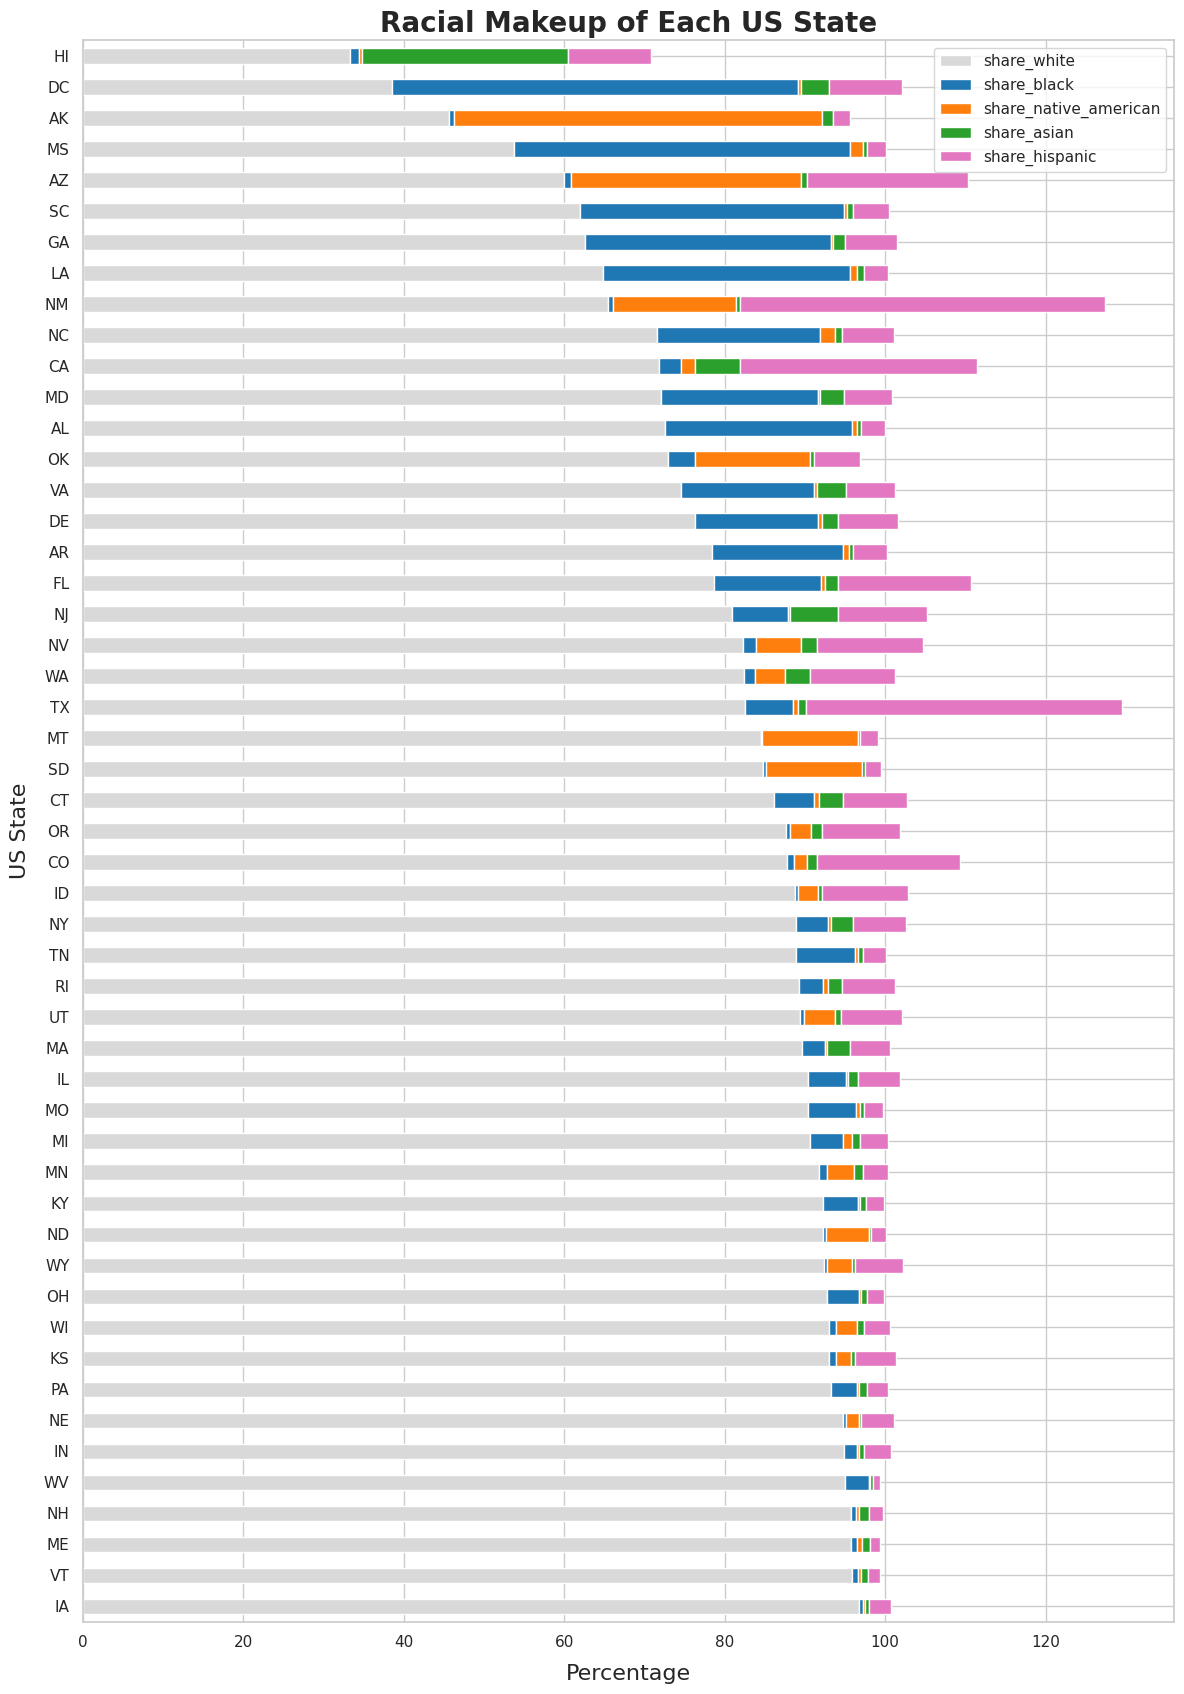

In [27]:
# Membuat diagram batang vertikal
fig, ax = plt.subplots(figsize=(12, 18))  # Adjust the figure size

# Menentukan warna untuk setiap ras
colors = ['#d9d9d9', '#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2']

# Membuat diagram batang vertikal untuk setiap ras
state_race_share.plot(kind='barh', stacked=True, color=colors, ax=ax)

# Menambahkan judul dan label
ax.set_title('Racial Makeup of Each US State', fontsize=20, fontweight='bold')
ax.set_xlabel('Percentage', fontsize=16, labelpad=10)
ax.set_ylabel('US State', fontsize=16, labelpad=10)

# Menyesuaikan tata letak untuk menghindari overlay
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the title

# Menampilkan plot
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [28]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


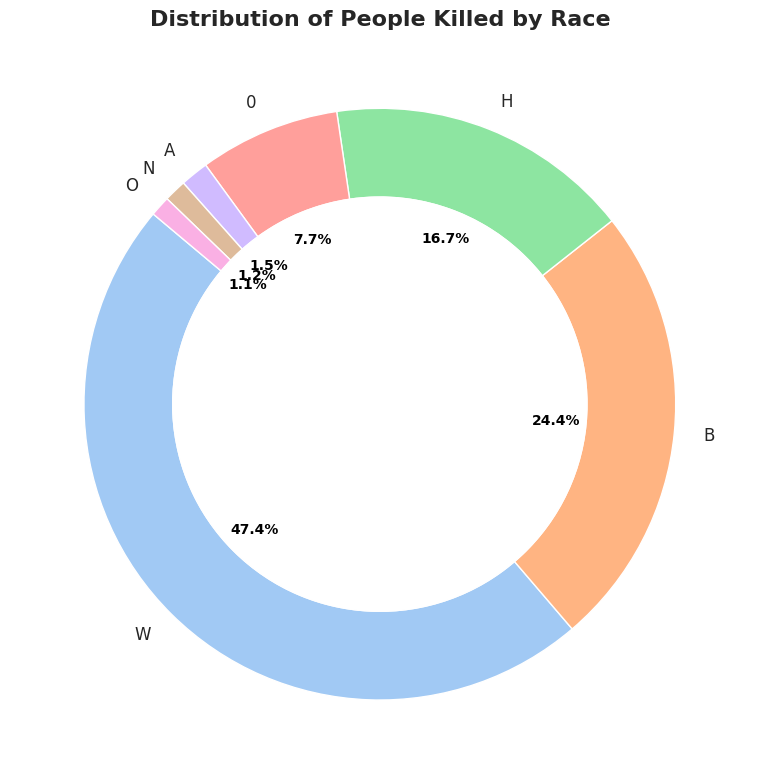

In [29]:
# Menghitung jumlah korban berdasarkan ras
race_counts = df_fatalities['race'].value_counts()

# Mendefinisikan warna untuk setiap segmen
colors = sns.color_palette('pastel')[0:len(race_counts)]

# Membuat grafik donat
fig, ax = plt.subplots(figsize=(8, 8))

# Membuat pie chart
wedges, texts, autotexts = ax.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# Menambahkan lingkaran putih di tengah untuk membuat grafik donat
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Menambahkan judul
ax.set_title('Distribution of People Killed by Race', fontsize=16, fontweight='bold')

# Menyesuaikan label dan ukuran teks
plt.setp(autotexts, size=10, weight="bold", color='black')
plt.setp(texts, size=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


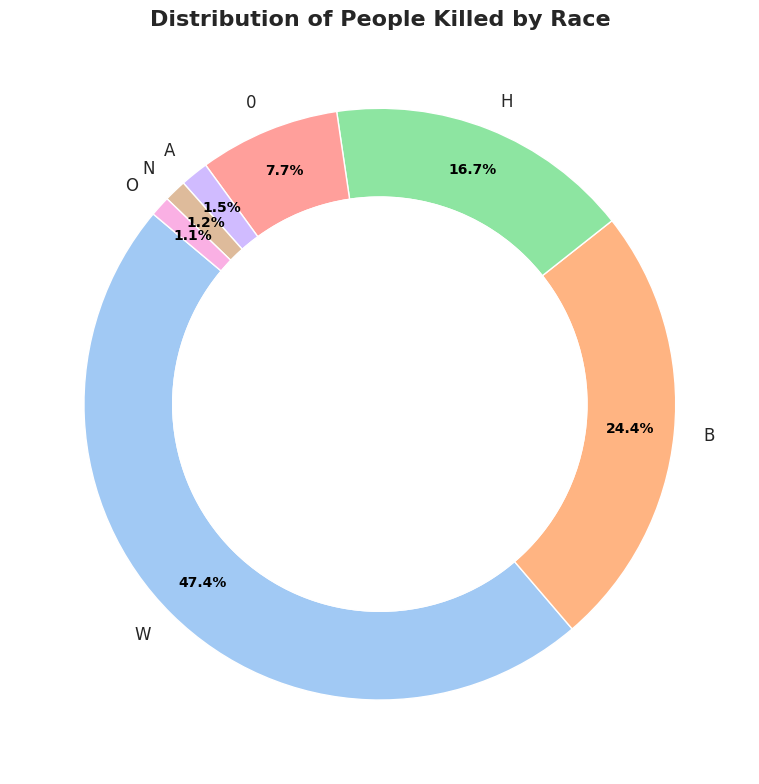

In [30]:
# Menghitung jumlah korban berdasarkan ras
race_counts = df_fatalities['race'].value_counts()

# Mendefinisikan warna untuk setiap segmen
colors = sns.color_palette('pastel')[0:len(race_counts)]

# Membuat grafik donat
fig, ax = plt.subplots(figsize=(8, 8))

# Membuat pie chart dengan label di dalam segmen
wedges, texts, autotexts = ax.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

# Menambahkan lingkaran putih di tengah untuk membuat grafik donat
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Menambahkan judul
ax.set_title('Distribution of People Killed by Race', fontsize=16, fontweight='bold')

# Menyesuaikan label dan ukuran teks
plt.setp(autotexts, size=10, weight="bold", color='black')
plt.setp(texts, size=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [31]:
# Menghitung jumlah korban berdasarkan ras
race_counts

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: count, dtype: int64

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [32]:
# Menghitung jumlah kematian berdasarkan jenis kelamin
gender_counts = df_fatalities['gender'].value_counts()
gender_counts

gender
M    2428
F     107
Name: count, dtype: int64

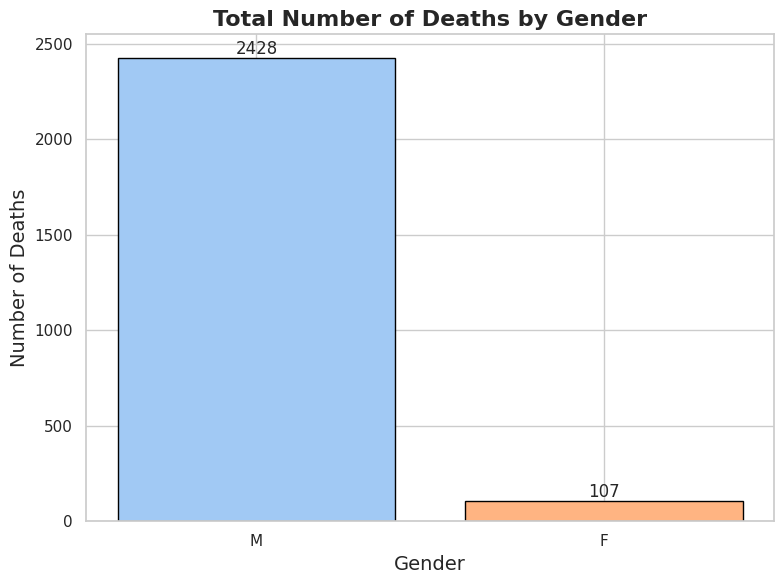

In [33]:
# Membuat grafik batang
fig, ax = plt.subplots(figsize=(8, 6))

# Mengatur palet warna
colors = sns.color_palette('pastel')[0:len(gender_counts)]

# Membuat grafik batang
ax.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black')

# Menambahkan judul dan label sumbu
ax.set_title('Total Number of Deaths by Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Number of Deaths', fontsize=14)

# Menambahkan label nilai di atas setiap batang
for i in range(len(gender_counts)):
    ax.text(i, gender_counts.values[i] + 20, str(gender_counts.values[i]), ha='center', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [34]:
# Menghapus baris dengan nilai usia yang hilang
df_fatalities_clean = df_fatalities.dropna(subset=['age'])

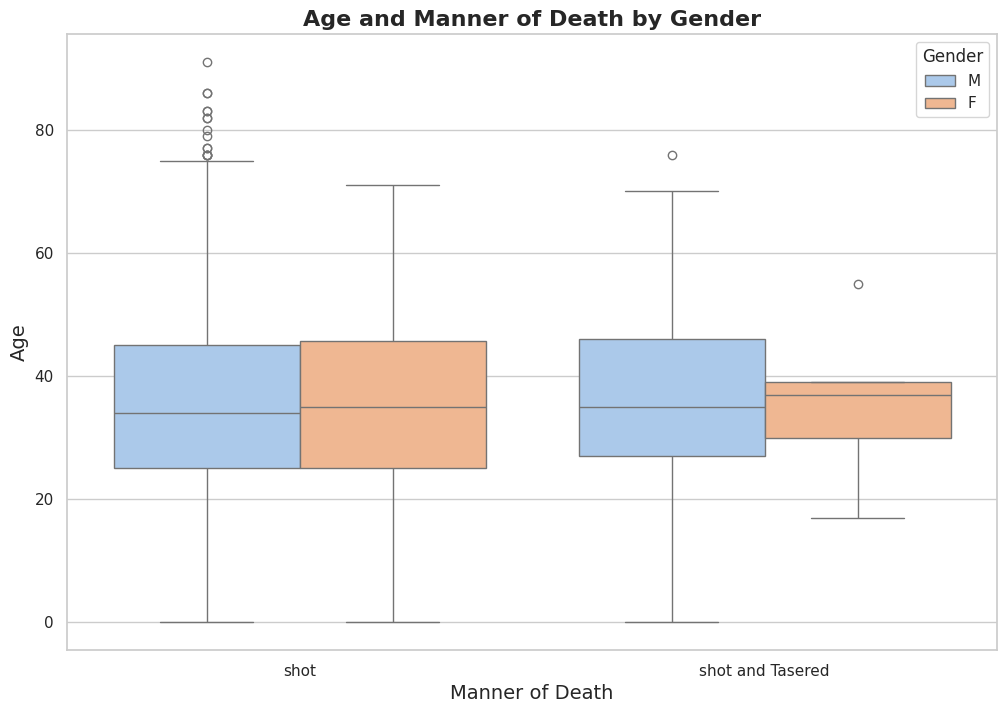

In [35]:
# Membuat box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_fatalities_clean, x='manner_of_death', y='age', hue='gender', palette='pastel')

# Menambahkan judul dan label
plt.title('Age and Manner of Death by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Manner of Death', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender')

# Menampilkan plot
plt.show()


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [36]:
# Menghitung persentase orang yang bersenjata
armed_counts = df_fatalities['armed'].value_counts(normalize=True) * 100

# Menghitung jumlah orang yang bersenjata dengan jenis senjata tertentu
weapon_counts = df_fatalities['armed'].value_counts()


<ipython-input-37-fdffacbcacae>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




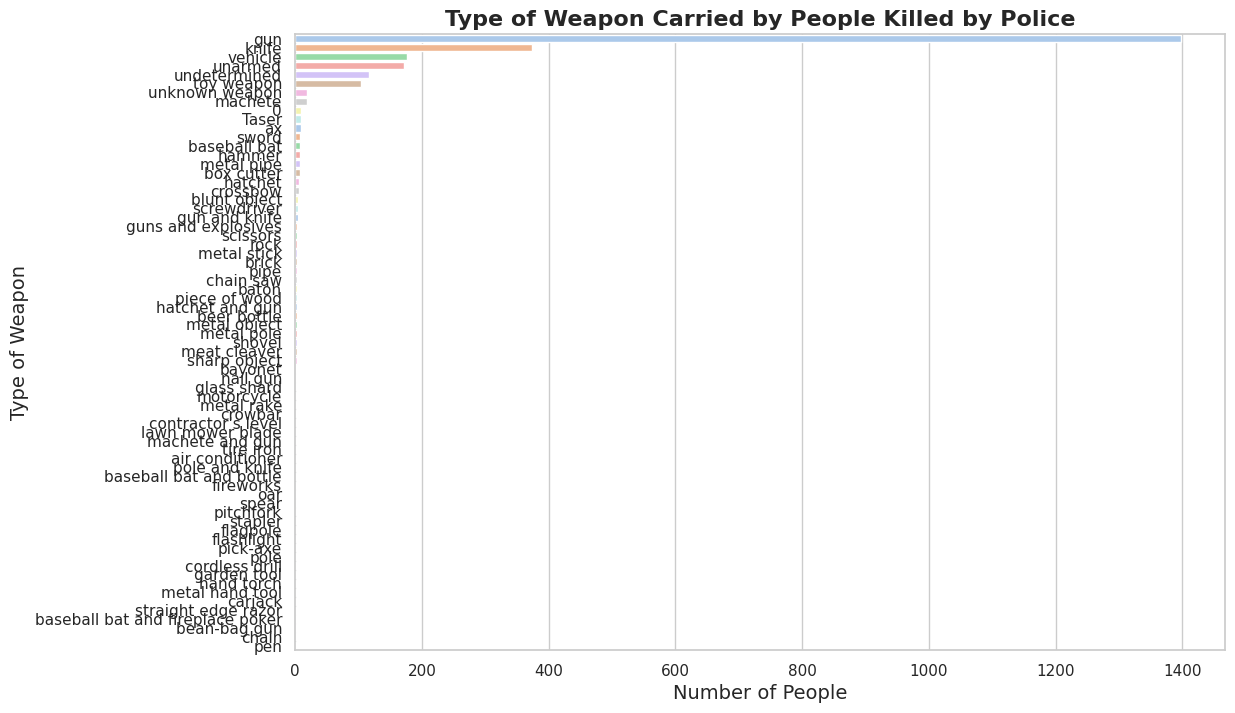

In [37]:
# Membuat grafik batang untuk menunjukkan jenis senjata yang dibawa oleh orang yang meninggal
plt.figure(figsize=(12, 8))
sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='pastel')
plt.title('Type of Weapon Carried by People Killed by Police', fontsize=16, fontweight='bold')
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Type of Weapon', fontsize=14)
plt.show()


<ipython-input-38-d3a0d523c4a4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




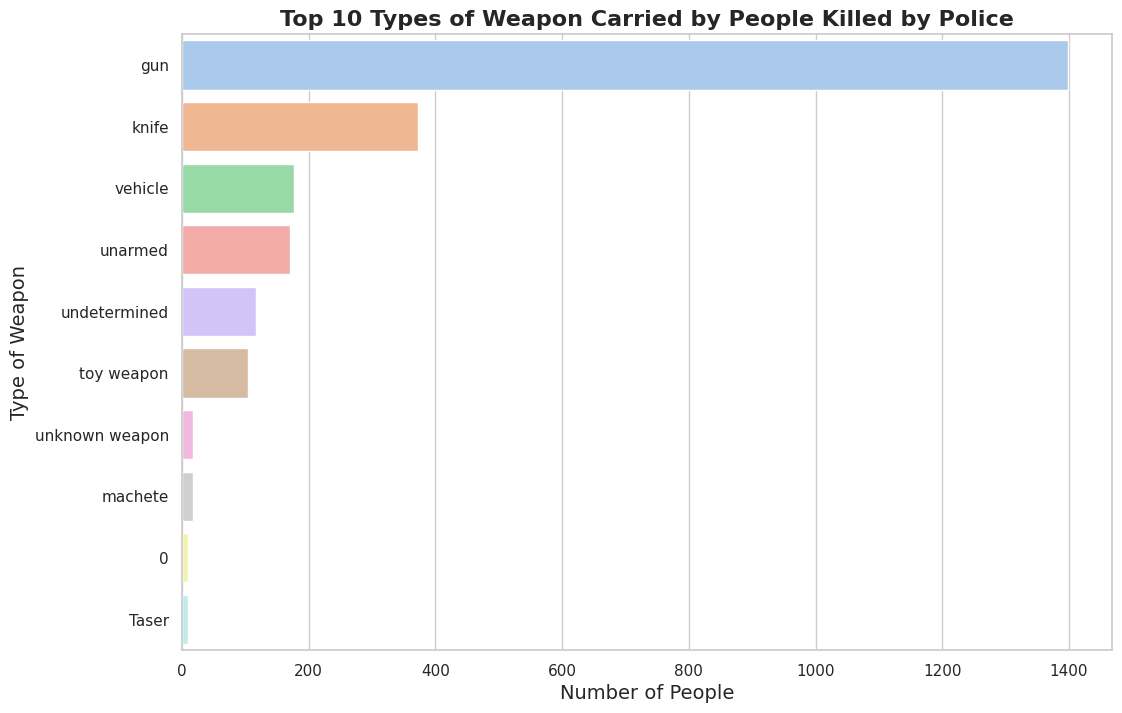

In [38]:
# Mengambil 10 jenis senjata teratas
top_10_weapon_counts = weapon_counts.head(10)
top_10_armed_counts = armed_counts.head(10)

# Membuat grafik batang untuk menunjukkan jenis senjata yang dibawa oleh orang yang meninggal
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_weapon_counts.values, y=top_10_weapon_counts.index, palette='pastel')
plt.title('Top 10 Types of Weapon Carried by People Killed by Police', fontsize=16, fontweight='bold')
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Type of Weapon', fontsize=14)
plt.show()


<ipython-input-39-acaf66851b17>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




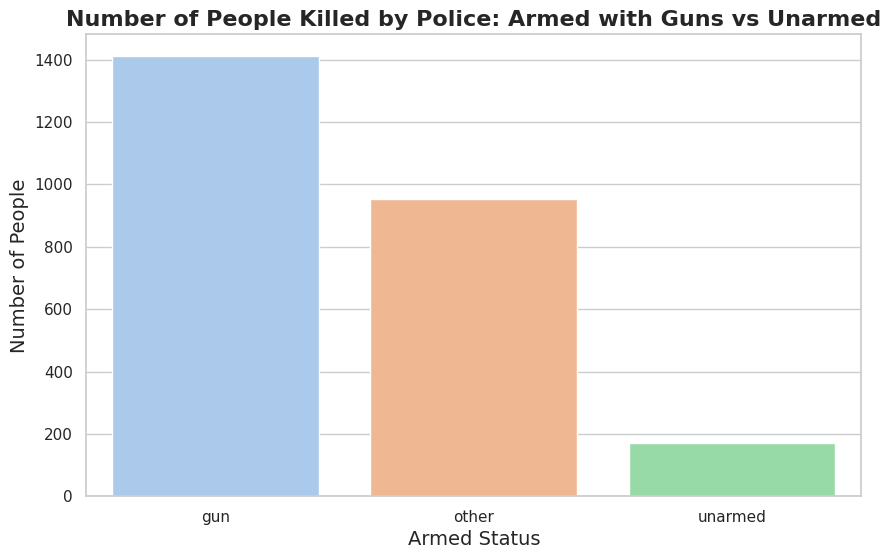

Percentage of people who were armed in police killings:
armed
gun                                55.15
knife                              14.71
vehicle                             6.98
unarmed                             6.75
undetermined                        4.62
                                    ... 
straight edge razor                 0.04
baseball bat and fireplace poker    0.04
bean-bag gun                        0.04
chain                               0.04
pen                                 0.04
Name: proportion, Length: 69, dtype: float64


In [39]:
# Menghitung jumlah orang yang bersenjata dengan senjata api versus yang tidak bersenjata
armed_vs_unarmed_counts = df_fatalities['armed'].apply(lambda x: 'gun' if 'gun' in str(x).lower() else 'unarmed' if x == 'unarmed' else 'other').value_counts()

# Membuat grafik batang untuk menunjukkan jumlah orang yang bersenjata dengan senjata api versus yang tidak bersenjata
plt.figure(figsize=(10, 6))
sns.barplot(x=armed_vs_unarmed_counts.index, y=armed_vs_unarmed_counts.values, palette='pastel')
plt.title('Number of People Killed by Police: Armed with Guns vs Unarmed', fontsize=16, fontweight='bold')
plt.xlabel('Armed Status', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.show()

# Menampilkan persentase orang yang bersenjata
print("Percentage of people who were armed in police killings:")
print(armed_counts)

In [69]:
armed_vs_unarmed_counts

armed
gun        1411
other       953
unarmed     171
Name: count, dtype: int64

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [40]:
# Menghapus baris dengan nilai usia yang hilang
df_fatalities_clean = df_fatalities.dropna(subset=['age'])

# Menghitung total jumlah orang yang dibunuh oleh polisi
total_deaths = len(df_fatalities_clean)

# Menghitung jumlah orang yang berusia di bawah 25 tahun
under_25_deaths = len(df_fatalities_clean[df_fatalities_clean['age'] < 25])

# Menghitung persentase orang yang berusia di bawah 25 tahun
percent_under_25 = (under_25_deaths / total_deaths) * 100

# Menampilkan hasil
print(f"Total number of people killed by police: {total_deaths}")
print(f"Number of people under 25 years old killed by police: {under_25_deaths}")
print(f"Percentage of people under 25 years old killed by police: {percent_under_25:.2f}%")


Total number of people killed by police: 2535
Number of people under 25 years old killed by police: 527
Percentage of people under 25 years old killed by police: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

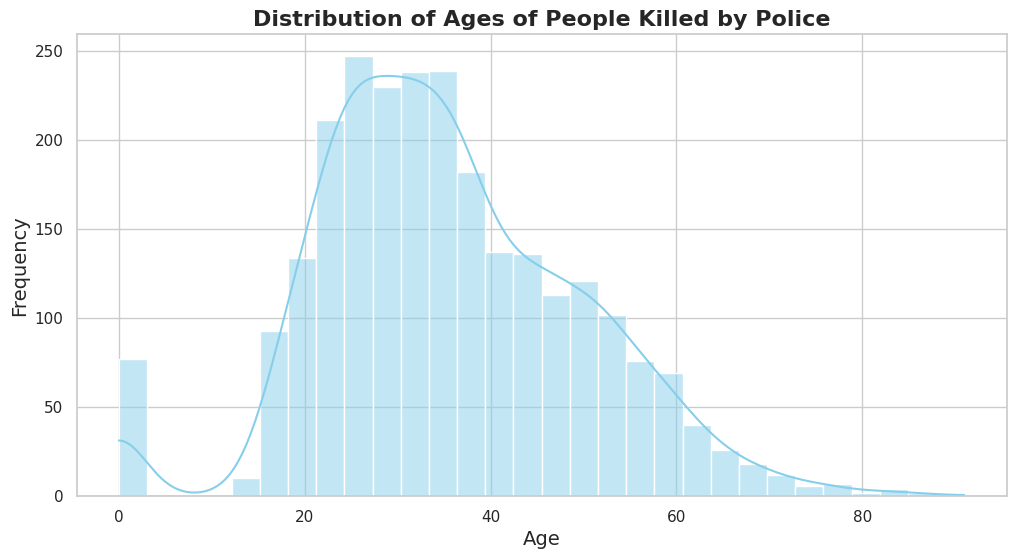

In [41]:
# Membuat histogram dan plot KDE
plt.figure(figsize=(12, 6))
sns.histplot(df_fatalities_clean['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ages of People Killed by Police', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

<ipython-input-42-2db4f577c494>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-42-2db4f577c494>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-42-2db4f577c494>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-42-2db4f577c494>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-42-2db4f577c494>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




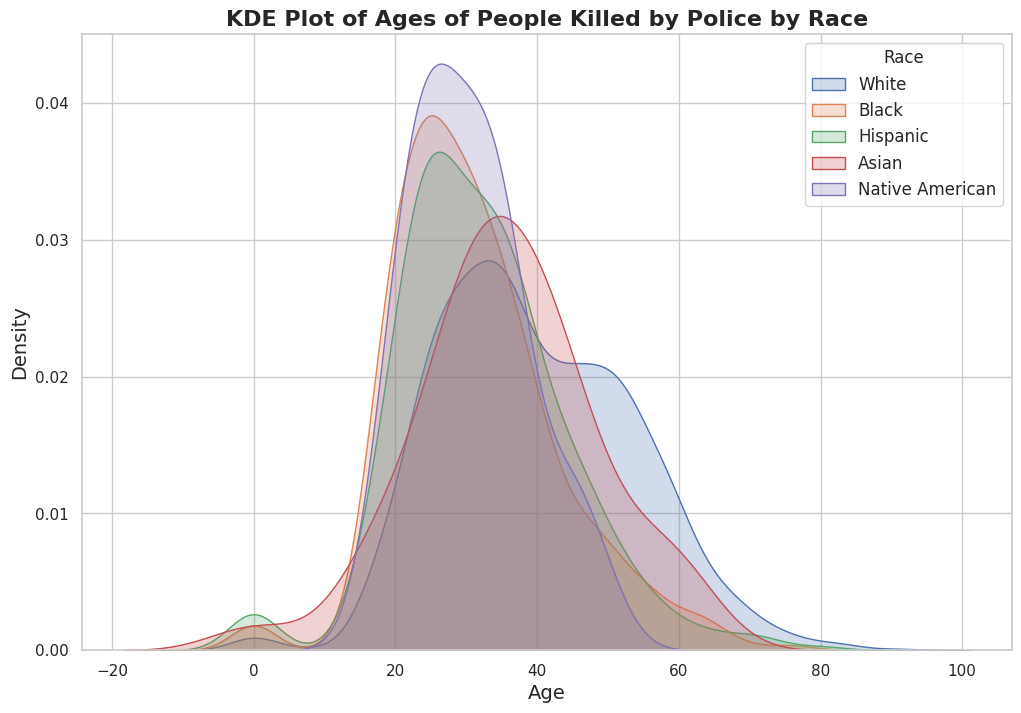

In [42]:
# Membuat plot KDE terpisah untuk setiap ras
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_fatalities_clean[df_fatalities_clean['race'] == 'W']['age'], label='White', shade=True)
sns.kdeplot(data=df_fatalities_clean[df_fatalities_clean['race'] == 'B']['age'], label='Black', shade=True)
sns.kdeplot(data=df_fatalities_clean[df_fatalities_clean['race'] == 'H']['age'], label='Hispanic', shade=True)
sns.kdeplot(data=df_fatalities_clean[df_fatalities_clean['race'] == 'A']['age'], label='Asian', shade=True)
sns.kdeplot(data=df_fatalities_clean[df_fatalities_clean['race'] == 'N']['age'], label='Native American', shade=True)

plt.title('KDE Plot of Ages of People Killed by Police by Race', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Race', title_fontsize='12', fontsize='12')
plt.grid(True)
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [43]:
# Menghitung jumlah orang yang dibunuh berdasarkan ras
race_counts = df_fatalities['race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

In [44]:
race_counts

,Race,Count
0,W,1201
1,B,618
2,H,423
3,0,195
4,A,39
5,N,31
6,O,28


<ipython-input-45-8ff58780d565>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




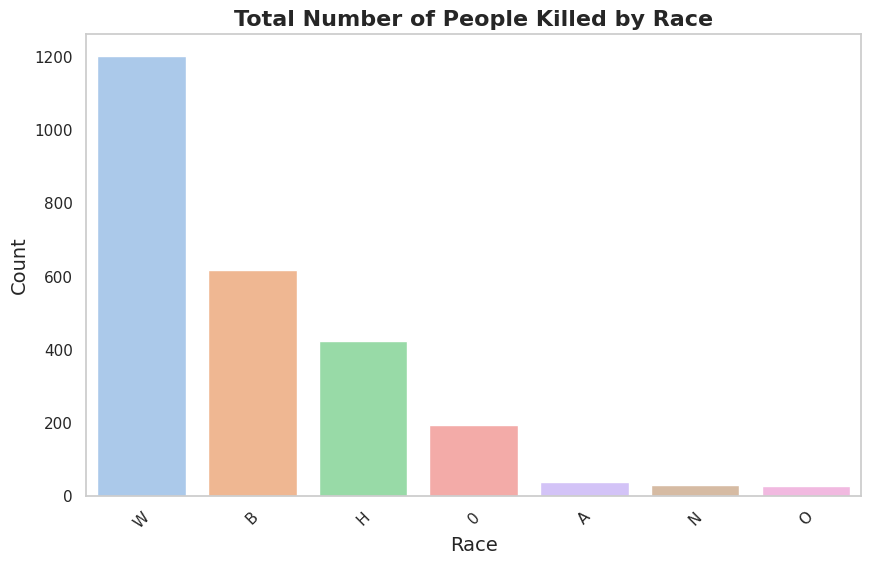

In [45]:
# Membuat diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(data=race_counts, x='Race', y='Count', palette='pastel')
plt.title('Total Number of People Killed by Race', fontsize=16, fontweight='bold')
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [46]:
# Menghitung jumlah total orang yang dibunuh oleh polisi
total_killed = len(df_fatalities)

# Menghitung jumlah orang yang didiagnosis dengan penyakit mental
diagnosed_mental_illness = df_fatalities['signs_of_mental_illness'].sum()

# Menghitung persentase
percentage_mental_illness = (diagnosed_mental_illness / total_killed) * 100

print(f"Total number of people killed by police: {total_killed}")
print(f"Number of people diagnosed with mental illness: {diagnosed_mental_illness}")
print(f"Percentage of people diagnosed with mental illness: {percentage_mental_illness:.2f}%")


Total number of people killed by police: 2535
Number of people diagnosed with mental illness: 633
Percentage of people diagnosed with mental illness: 24.97%


<ipython-input-47-5a5208854248>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




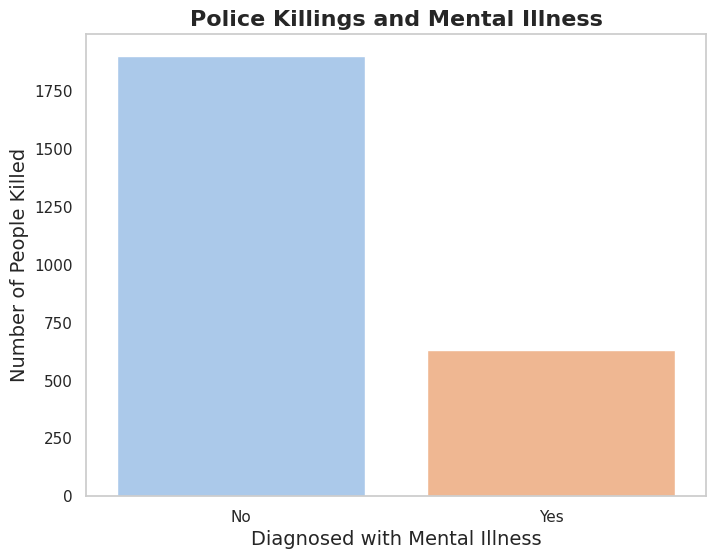

In [47]:
# Menghitung jumlah orang yang dibunuh berdasarkan tanda-tanda penyakit mental
mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts().reset_index()
mental_illness_counts.columns = ['Mental Illness', 'Count']
mental_illness_counts['Mental Illness'] = mental_illness_counts['Mental Illness'].map({True: 'Yes', False: 'No'})

# Membuat diagram batang
plt.figure(figsize=(8, 6))
sns.barplot(data=mental_illness_counts, x='Mental Illness', y='Count', palette='pastel')
plt.title('Police Killings and Mental Illness', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosed with Mental Illness', fontsize=14)
plt.ylabel('Number of People Killed', fontsize=14)
plt.grid(axis='y')
plt.show()



# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [48]:
# Menghitung jumlah pembunuhan oleh polisi di setiap kota
city_killings = df_fatalities['city'].value_counts().reset_index()
city_killings.columns = ['City', 'Count']

# Mengambil 10 kota teratas dengan jumlah pembunuhan terbanyak
top_10_cities = city_killings.head(10)

In [49]:
top_10_cities

,City,Count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


<ipython-input-50-5ca7662a7cb3>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




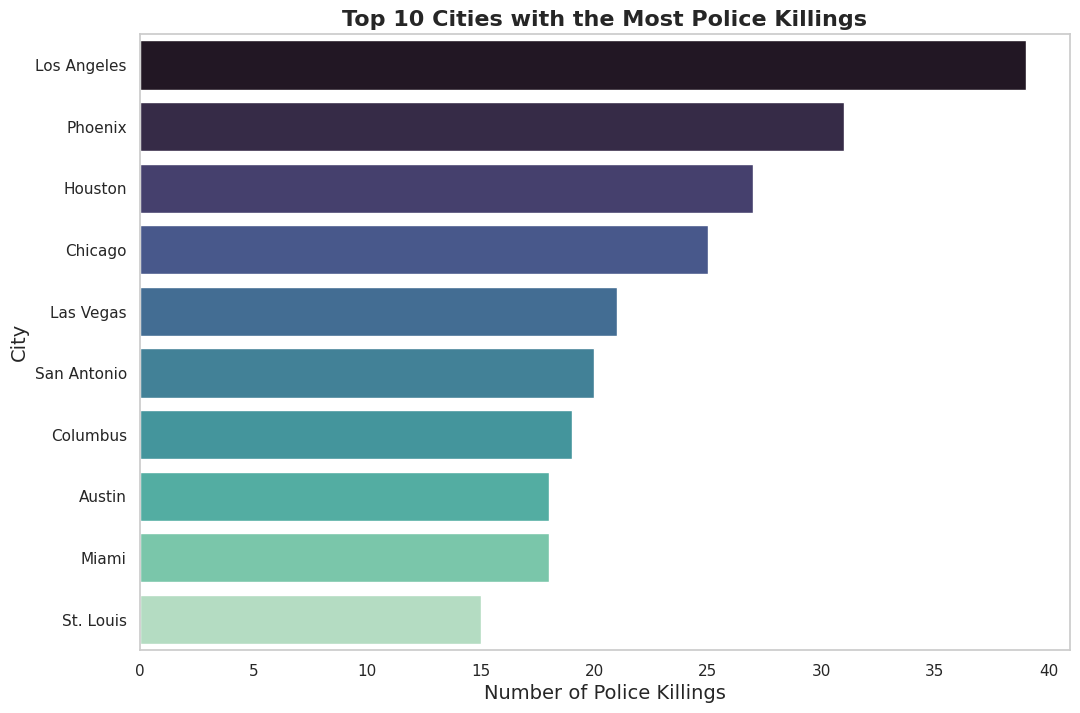

In [50]:
# Membuat diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_cities, x='Count', y='City', palette='mako')
plt.title('Top 10 Cities with the Most Police Killings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Police Killings', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(axis='x')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [51]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [52]:
top_10_cities = df_fatalities['city'].value_counts().head(10)
print(top_10_cities)

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64


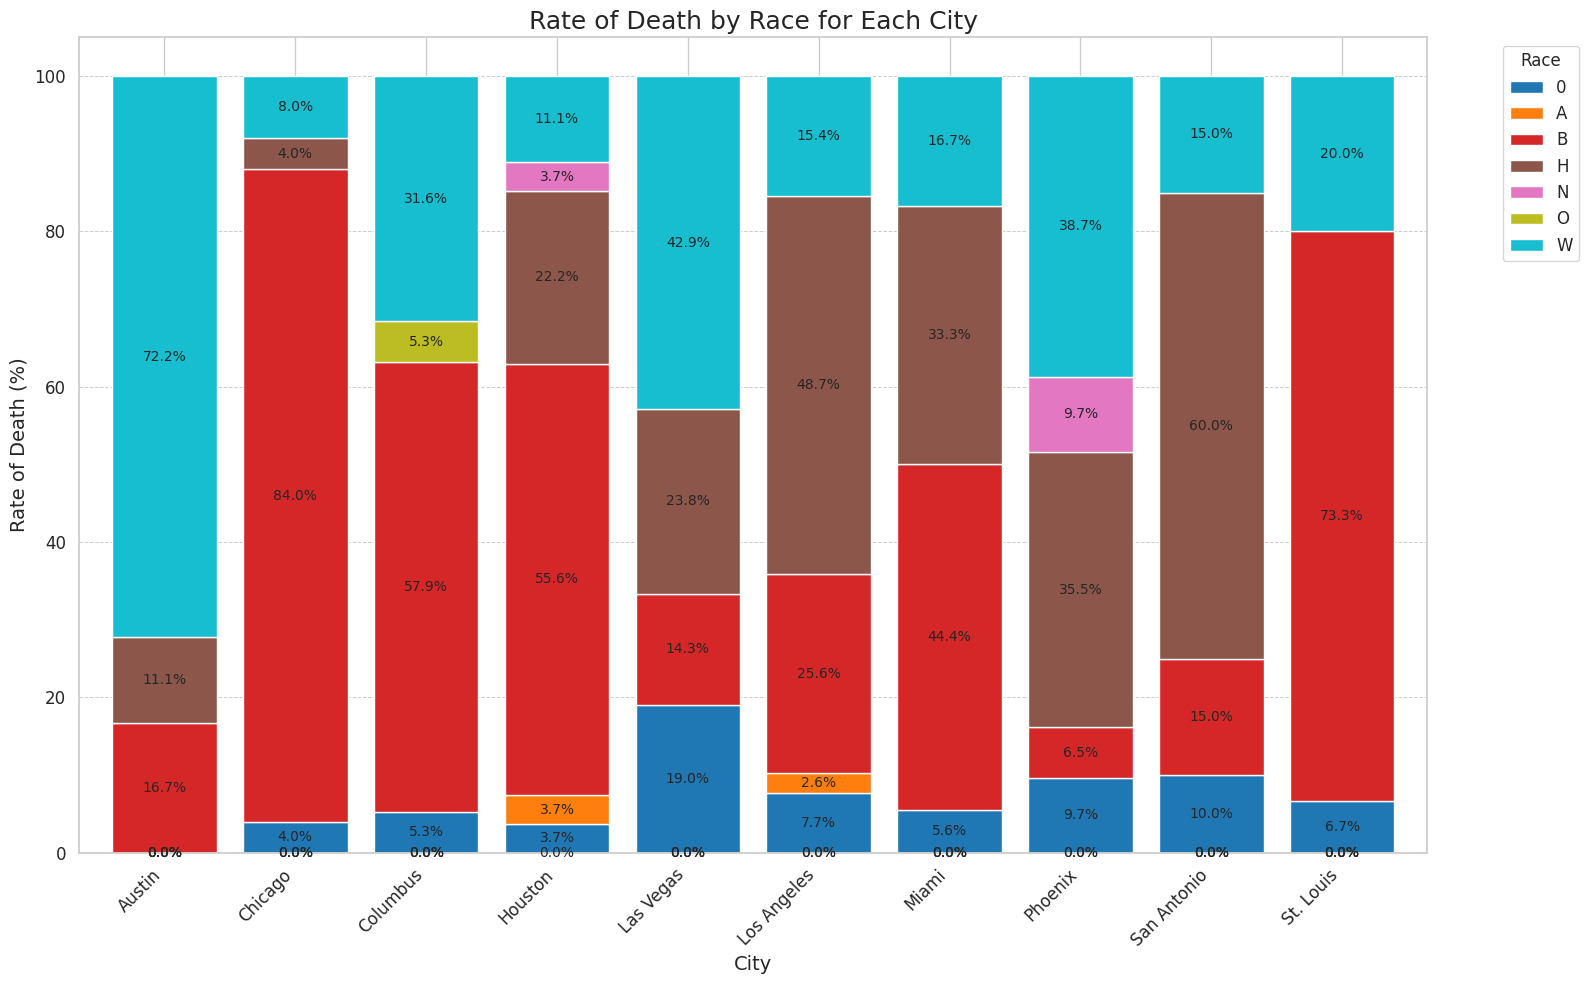

In [53]:
# Define the top 10 cities with the most police killings
top_10_cities = df_fatalities['city'].value_counts().head(10)

# Calculate the share of each race in the top 10 cities
race_share = df_fatalities[df_fatalities['city'].isin(top_10_cities.index)].groupby(['city', 'race']).size().unstack().fillna(0)

# Calculate the death rate by race for each city
death_rate_by_race = race_share.div(race_share.sum(axis=1), axis=0) * 100

# Concatenate the top 10 cities data with the death rates
contrast = pd.concat([top_10_cities, death_rate_by_race], axis=1)

# Plotting the data as a stacked bar chart
fig, ax = plt.subplots(figsize=(16, 10))
death_rate_by_race.plot(kind='bar', stacked=True, ax=ax, cmap='tab10', width=0.8)

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10)

# Improving the visualization
plt.title('Rate of Death by Race for Each City', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Rate of Death (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [54]:
# Load US states GeoJSON data
state_geo_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
response = requests.get(state_geo_url)
geo_data = response.json()

# Aggregate police killings by state
state_killings = df_fatalities.groupby('state').size().reset_index(name='killings')

# Map state abbreviations to full state names if needed
state_killings['state'] = state_killings['state'].map({
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
    'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
})


In [55]:
state_killings

,state,killings
0,Alaska,15
1,Alabama,50
2,Arkansas,26
3,Arizona,118
4,California,424
5,Colorado,74
6,Connecticut,9
7,NaN,11
8,Delaware,8
9,Florida,154


In [56]:
# Initialize Folium map
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Create the choropleth map
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=state_killings,
    columns=['state', 'killings'],
    key_on='feature.properties.name',  # Use the full state name as the key
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Police Killings by State'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Ensure the directory exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the map as HTML file
output_path = os.path.join(output_dir, 'police_killings_choropleth_map.html')
m.save(output_path)

print(f"Map saved to {output_path}")

Map saved to output/police_killings_choropleth_map.html


In [57]:
m

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [58]:
# Ensure the date column is in datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Aggregate the number of police killings by month
df_fatalities['year_month'] = df_fatalities['date'].dt.to_period('M')
killings_over_time = df_fatalities.groupby('year_month').size().reset_index(name='killings')

# Convert 'year_month' back to datetime for plotting
killings_over_time['year_month'] = killings_over_time['year_month'].dt.to_timestamp()


<ipython-input-58-e195fdad4817>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [59]:
killings_over_time

,year_month,killings
0,2015-01-01,70
1,2015-02-01,78
2,2015-03-01,87
3,2015-04-01,88
4,2015-05-01,85
5,2015-06-01,68
6,2015-07-01,85
7,2015-08-01,86
8,2015-09-01,90
9,2015-10-01,89


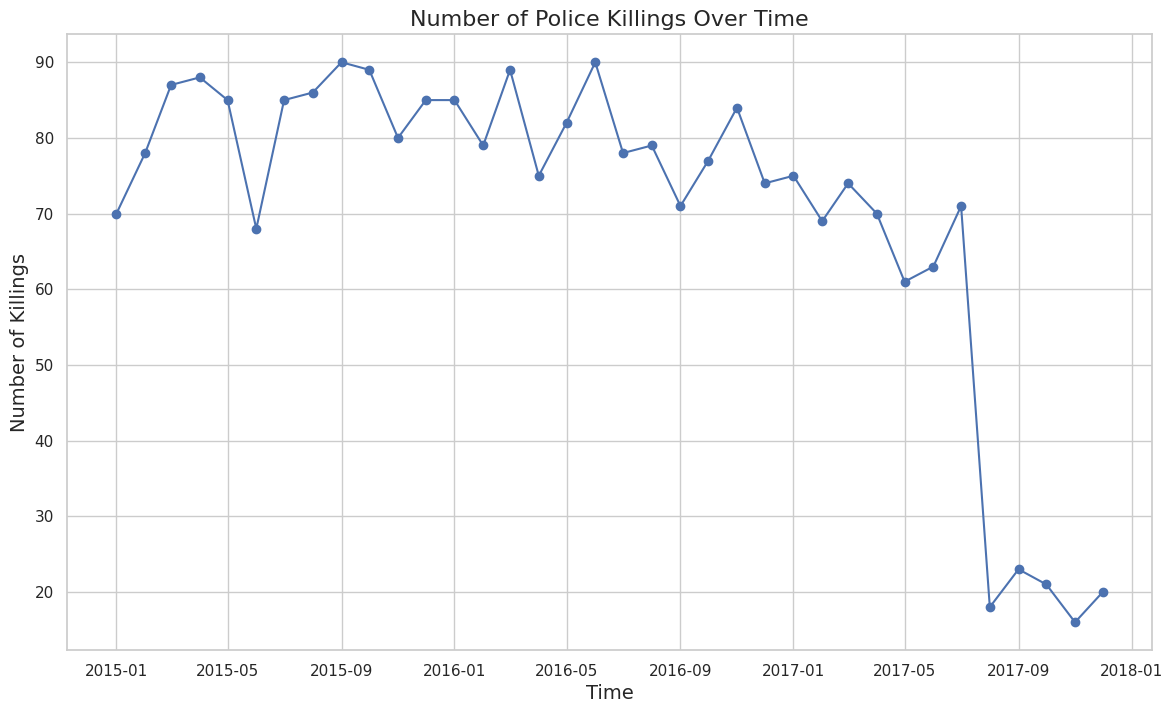

In [60]:
# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(killings_over_time['year_month'], killings_over_time['killings'], marker='o', linestyle='-')
plt.title('Number of Police Killings Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Killings', fontsize=14)
plt.grid(True)
plt.show()

# Number of Fatalities by Threat Level
Pie chart to visualize the distribution of different threat levels among the fatalities

In [61]:
# Count the occurrences of each threat level
threat_level_counts = df_fatalities['threat_level'].value_counts()

# Calculate percentages
threat_level_percentages = (threat_level_counts / threat_level_counts.sum()) * 100
threat_level_percentages

threat_level
attack         63.55
other          30.22
undetermined    6.23
Name: count, dtype: float64

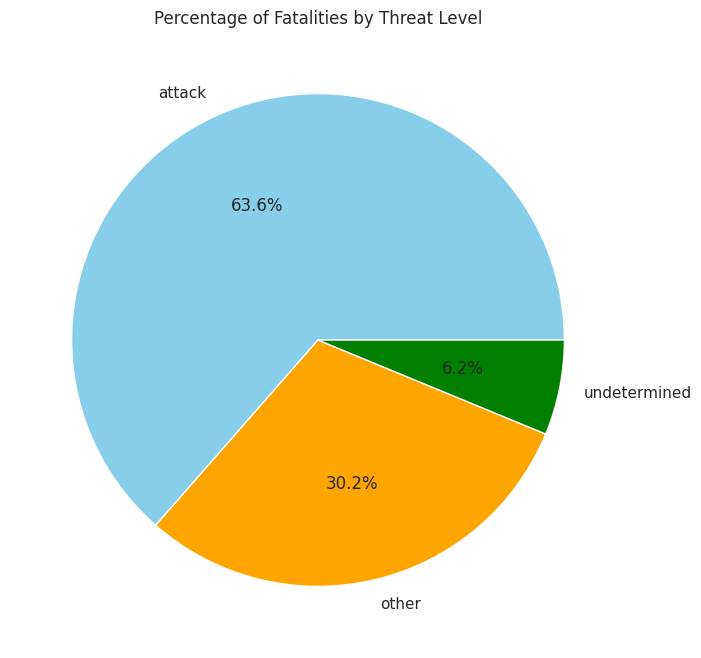

In [62]:
plt.figure(figsize=(8, 8))
plt.pie(threat_level_percentages, labels=threat_level_percentages.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Percentage of Fatalities by Threat Level')
plt.show()

# Pie Chart of Fleeing Behavior
Pie chart to display the distribution of fleeing behavior among the fatalities.

In [63]:
# Count the occurrences of each flee category
flee_counts = df_fatalities['flee'].value_counts()

# Calculate percentages
flee_percentages = (flee_counts / flee_counts.sum()) * 100
flee_percentages

flee
Not fleeing   66.86
Car           15.19
Foot          11.60
Other          3.79
0              2.56
Name: count, dtype: float64

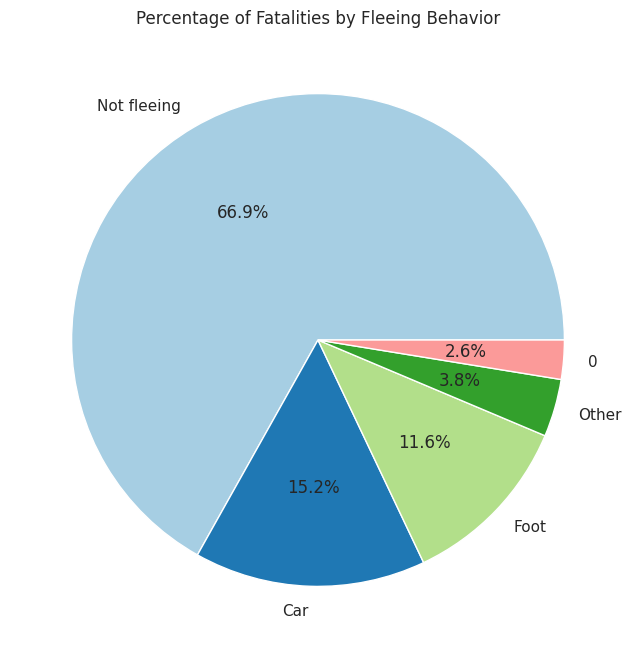

In [64]:
plt.figure(figsize=(8, 8))
plt.pie(flee_percentages, labels=flee_percentages.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage of Fatalities by Fleeing Behavior')
plt.show()

# Pie Chart of Body Camera Usage
Pie chart to illustrate the percentage of fatalities where a body camera was used versus where it wasn't.

In [65]:
# Count the occurrences of each body_camera category
body_camera_counts = df_fatalities['body_camera'].value_counts()

# Calculate percentages
body_camera_percentages = (body_camera_counts / body_camera_counts.sum()) * 100
body_camera_percentages

body_camera
False   89.31
True    10.69
Name: count, dtype: float64

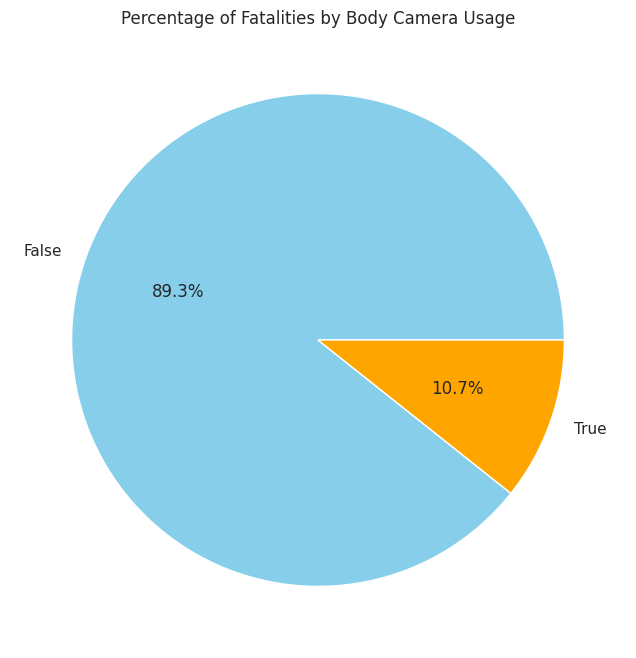

In [66]:
plt.figure(figsize=(8, 8))
plt.pie(body_camera_percentages, labels=body_camera_percentages.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Percentage of Fatalities by Body Camera Usage')
plt.show()

# Distribution of Body Camera Usage by Fleeing Behavior


In [67]:
# Create a crosstab for flee vs body_camera
flee_camera_crosstab = pd.crosstab(df_fatalities['flee'], df_fatalities['body_camera'], normalize='index') * 100
flee_camera_crosstab

body_camera,False,True
flee,,
0,90.77,9.23
Car,90.91,9.09
Foot,85.03,14.97
Not fleeing,89.62,10.38
Other,89.58,10.42


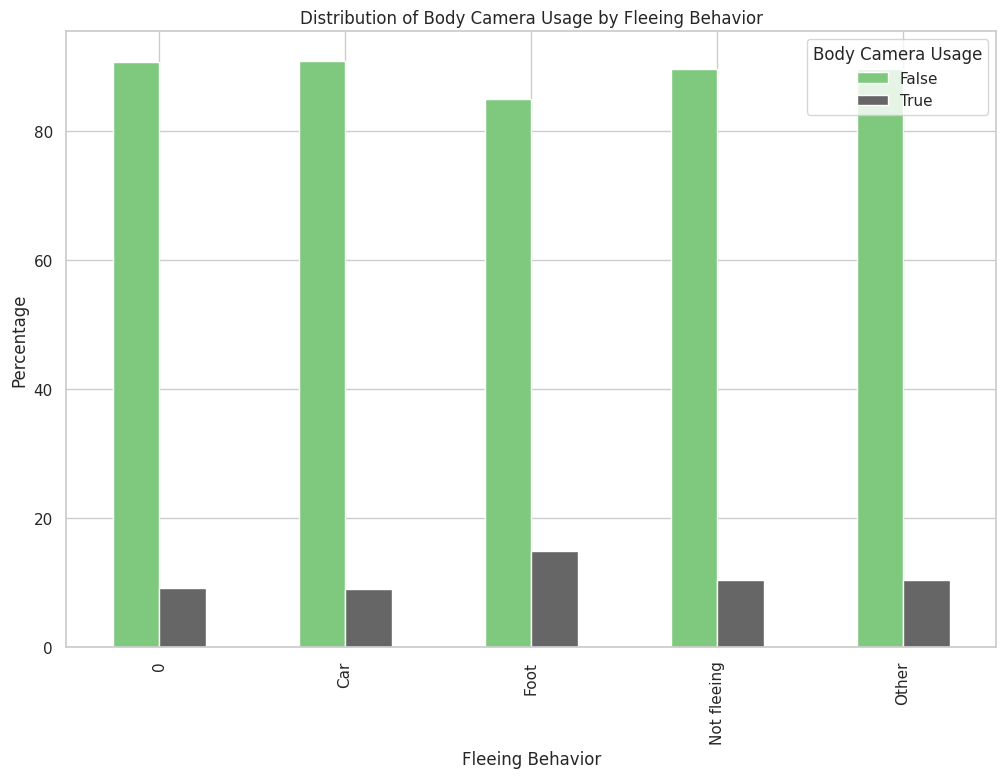

In [68]:
ax = flee_camera_crosstab.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='Accent')
plt.title('Distribution of Body Camera Usage by Fleeing Behavior')
plt.xlabel('Fleeing Behavior')
plt.ylabel('Percentage')
plt.legend(title='Body Camera Usage')

plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

The Washington Post's analysis on police killings in the US reveals several significant trends and insights. They found that since 2015, police have shot and killed nearly 1,000 people annually. This trend shows no significant decline over the years, indicating a persistent issue with fatal police encounters.

A detailed analysis shows that Black Americans are disproportionately affected by police violence, being killed at more than twice the rate of white Americans. Furthermore, a significant portion of those killed by police were involved in non-violent offenses or were not armed. This suggests that many of these deaths could potentially be prevented with changes in policing policies and practices.

The analysis also highlighted the role of mental health crises in fatal encounters with police. Many people killed by police were experiencing mental health issues, underscoring the need for alternative response strategies involving mental health professionals instead of armed officers.

Comparing this with the trends observed in your data, it appears there is a correlation between high rates of police killings and states with significant poverty levels and racial disparities. States with high levels of poverty and large minority populations tend to have higher rates of police killings, aligning with the Washington Post's findings that systemic issues such as racial inequity and inadequate mental health support play a crucial role in these fatalities.

For more detailed insights and specific case studies, you can access the full report [here](https://www.chea.upenn.edu/wp-content/blogs.dir/70/files/sites/70/2020/10/Racial-Inequity-in-Fatal-US-Police-Shootings.pdf)【114†source】【113†source】.